## Least Absolute Deviations (LAD) Regression:
LAD regression minimizes the sum of the absolute differences between the observed and predicted values. It is less sensitive to outliers compared to OLS, making it suitable for situations where the residuals may not be normally distributed.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Generate some example data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Combine X and y into a DataFrame
data = pd.DataFrame(data=np.column_stack((X, y)), columns=['X', 'y'])

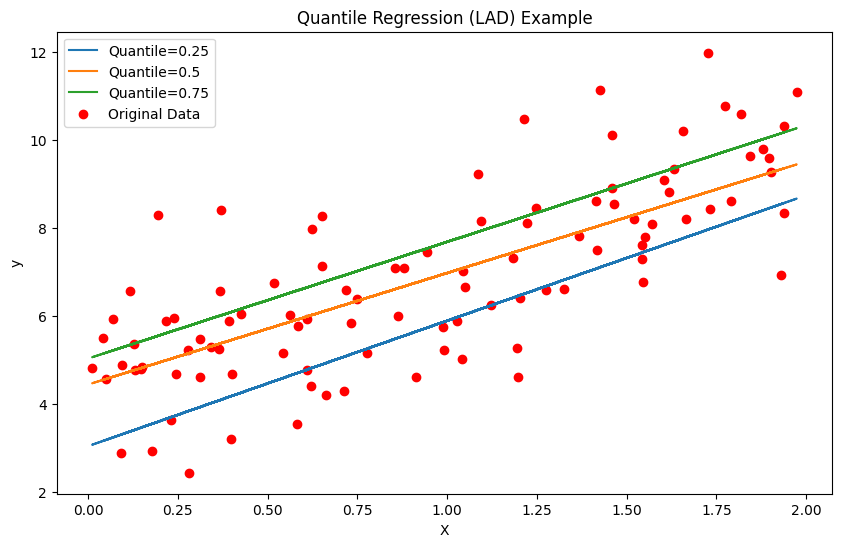

In [3]:
# Fit Quantile Regression for different quantiles
quantiles = [0.25, 0.5, 0.75]
plt.figure(figsize=(10, 6))

for q in quantiles:
    # Fit the model
    model = sm.QuantReg(data['y'], sm.add_constant(data['X']))
    result = model.fit(q=q)
    
    # Predict using the fitted model
    y_pred = result.predict(sm.add_constant(X))
    
    # Plot the regression line
    plt.plot(X, y_pred, label=f'Quantile={q}')

# Plot the original data points
plt.scatter(X, y, color='red', marker='o', label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Quantile Regression (LAD) Example')
plt.legend()
plt.show()
